In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
def ham(k, t=1):
    '''
    returns Hamiltonian for specific value of k
    k is a 2D vector as array with kx and ky already in units of a
    '''
    eps = 1e-15
    h = -2*t*np.array([[0, np.cos(k[0]/2), 0], [np.cos(k[0]/2), 0, np.cos(k[1]/2)], [0, np.cos(k[1]/2), 0]])
    h[np.abs(h) < 1e-15] = 0

    return h

In [105]:
ham(np.array([1,0]))[1,2]

-2.0

In [3]:
kx = np.linspace(0,10,10)
ky = np.linspace(10,20,10)
k = np.vstack((kx,ky)).T
k[0]
ham(k[0])
np.shape(kx)[0]
t1 = np.zeros((10, 3))
t1[0]=np.array([1,1,1])


a = [1, -3, 2]
np.sort(a)
a = np.linalg.eig(ham(k[0]))[0]
t1[0]=np.sort(a)
t1


array([[-2.07890763e+00,  8.47660465e-18,  2.07890763e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [4]:
def solvHam(kx, ky):
    '''
    solves hamiltonian for each pair of coordinates
    '''
    eps = 1e-15
    n = np.shape(kx)[0]
    eig = np.zeros((n, 3))


    k = np.vstack((kx, ky)).T
    
    for i in range(n):
        e = np.linalg.eig(ham(k[i]))[0]
        e[np.abs(e)<eps]=0
        eig[i]=np.sort(e)
    
    return eig.T

    

In [5]:
k = np.linspace(0, 2*np.pi, 1000)
k0 = np.zeros(1000)
k1 = np.ones(1000)

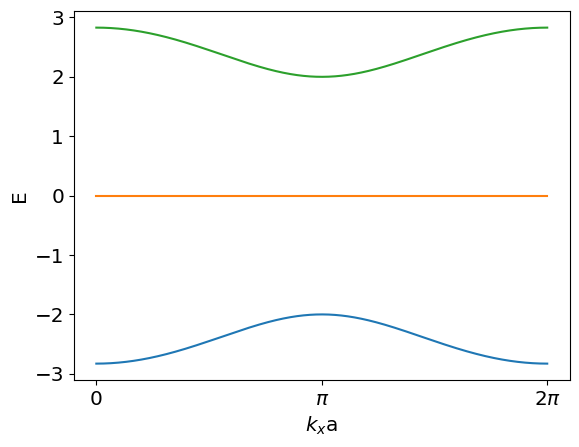

In [ ]:
plt.xlabel("$k_x$a", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [-np.pi, 0, np.pi, 2*np.pi], labels=[r"-$\pi$","0",r"$\pi$", r"2$\pi$"], size='x-large')

for j in range(3):
    plt.plot(np.sqrt(k**2+k0**2), solvHam(k, k0)[j])

#test
plt.savefig("Pictures/Ekx_num.png")
plt.show()

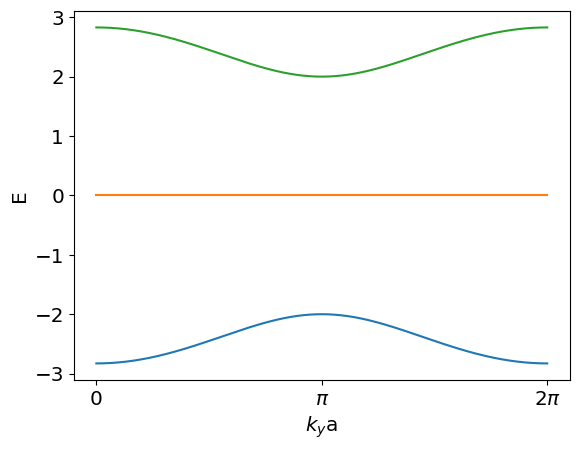

In [ ]:
plt.xlabel("$k_y$a", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [-np.pi, 0, np.pi, 2*np.pi], labels=[r"-$\pi$","0",r"$\pi$", r"2$\pi$"], size='x-large')

for j in range(3):
    plt.plot(np.sqrt(k**2+k0**2), solvHam(k0, k)[j])

#test
plt.savefig("Pictures/Eky_num.png")
plt.show()

In [73]:
solvHam(k, k)[0][0]

-2.8284271247461907

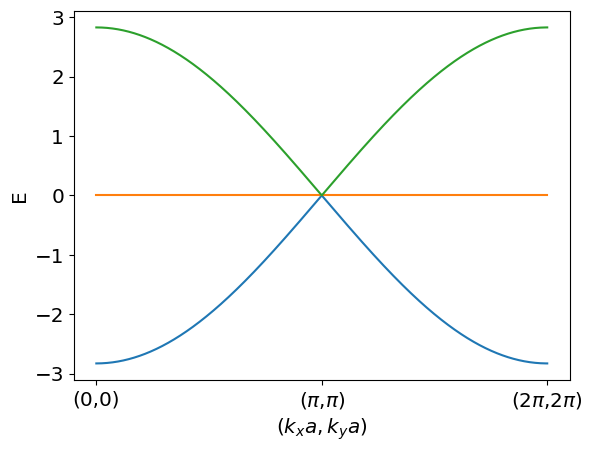

In [ ]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [-np.pi, 0, np.pi*np.sqrt(2), 2*np.pi*np.sqrt(2)], labels=[r"(-$\pi$,-$\pi$)","(0,0)",r"($\pi$,$\pi$)", r"(2$\pi$,2$\pi$)"], size='x-large')

for j in range(3):
    plt.plot(np.sqrt(k**2+k**2), solvHam(k, k)[j])

plt.savefig("Pictures/Ediag_num.png")
plt.show()

In [17]:
Es=np.array([[],[],[]])
A = np.concatenate((Es, solvHam(k[1]*k1,k)), axis=1)
np.shape(A)

(3, 1000)

In [18]:
Es=np.array([[],[],[]])
for i in k:
    Erow = solvHam(i*k1, k)
    Es = np.concatenate((Es, Erow), axis=1)

In [20]:
np.shape(Es)

(3, 1000000)

In [78]:
E = np.linspace(-2.83,2.83,200)
E = np.linspace(-4,4,200)


In [109]:
def DOS(E, En, sig=0.5):
    ''' 
    returns an array with the density of state values to each E

    E is an array (against which DOS is plotted)
    En is an array with the E-values for all k grid points of shape (3, ???) because we currently have 3 bands
    sigma is the width of the gauss function
    '''
    def Gauss(E, En, sig):
        return np.exp(-(E-En)**2/(2*sig**2))

    b, l = np.shape(En)
    s1 = 0
    res = np.ones(np.shape(E)[0])
    c=0
    for j in E:
        for i in range(b):
            s1 += np.sum(Gauss(j*np.ones(l),En[i], sig))
        res[c] = s1
        s1=0
        c+=1
    return res



In [110]:
DOS1 = DOS(E,Es, 2e-2)

In [85]:
emax = np.amax(Es)

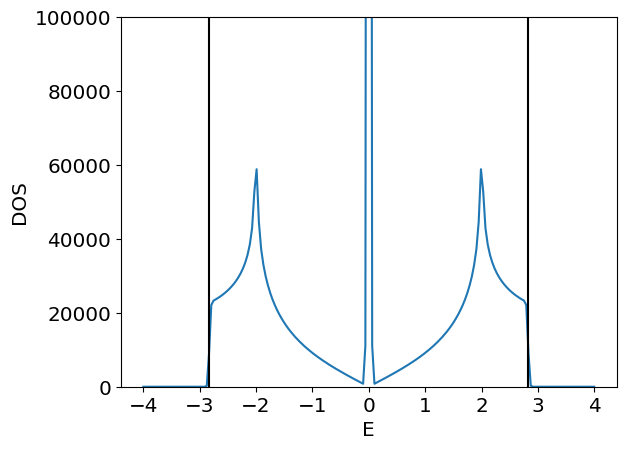

In [ ]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ylim(0, 1e5)
plt.plot(E, DOS1)
plt.vlines([emax, -emax], 0, 1e5, colors='black')

plt.savefig("Pictures/DOS.png")
plt.show()